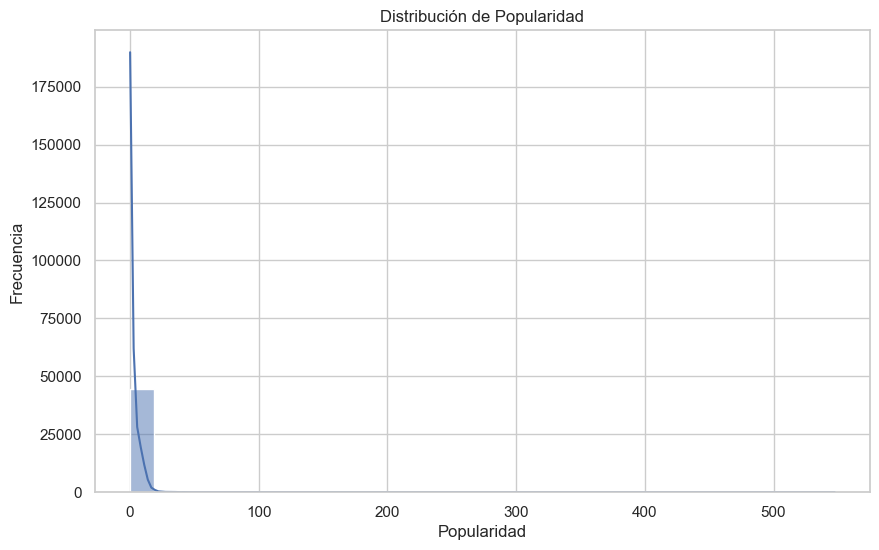

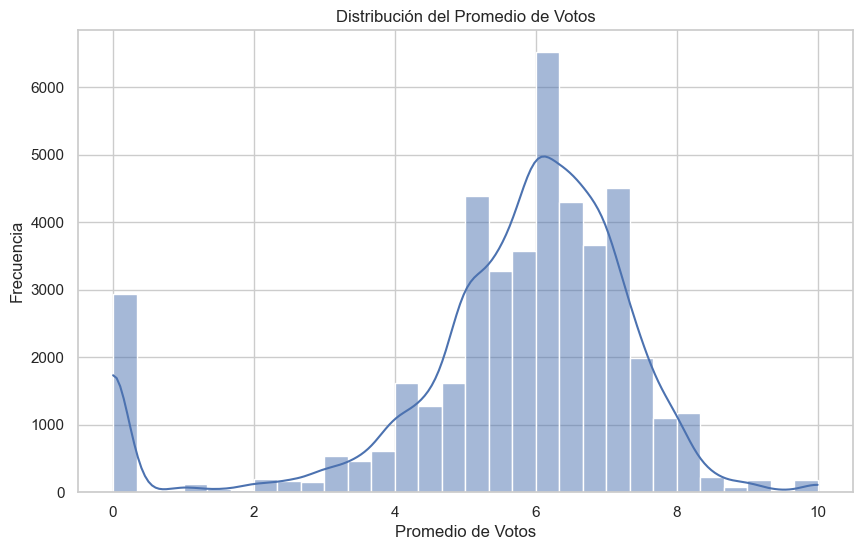

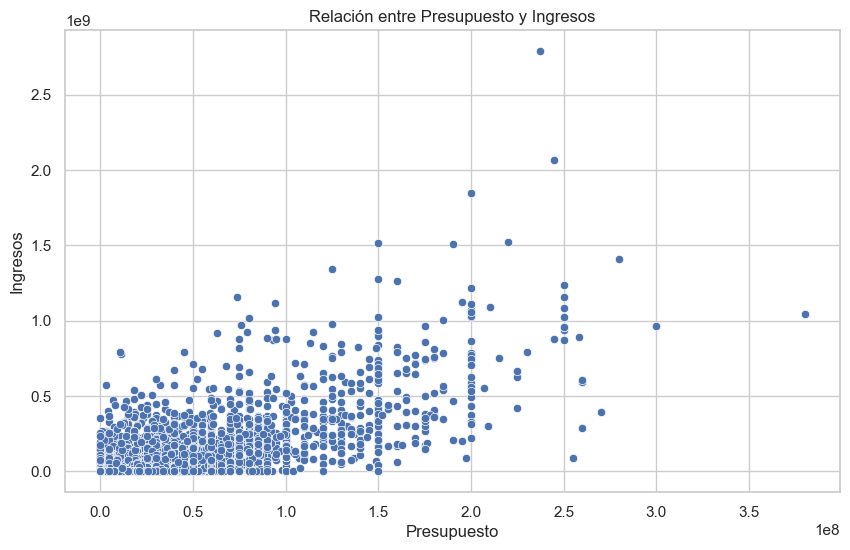

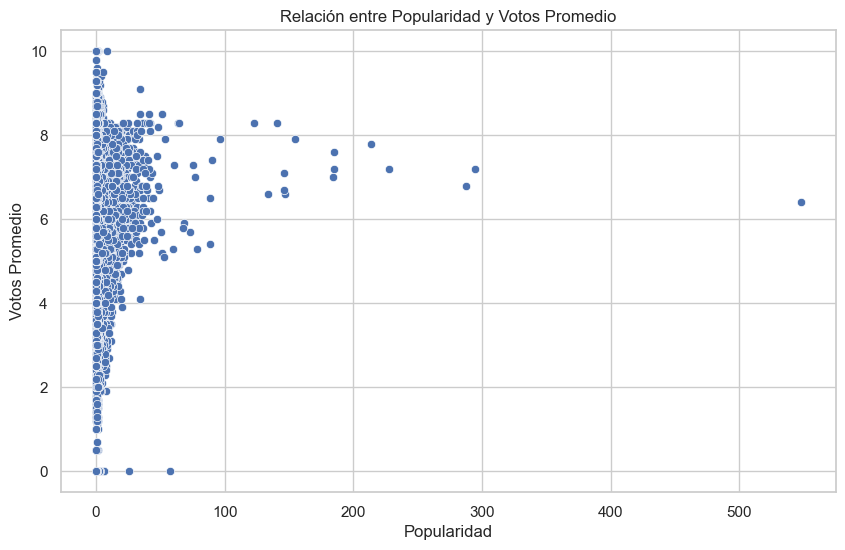

In [2]:
# Notebook de análisis de datos: data_analysis.ipynb

# Paso 1: Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo visual para los gráficos
sns.set(style="whitegrid")

# Paso 2: Cargar los datos
ruta_datos = '../DATASET/movies_credits_merged.parquet'
movies = pd.read_parquet(ruta_datos)

# Paso 3: Análisis de distribuciones

## Distribución de popularidad
plt.figure(figsize=(10, 6))
sns.histplot(movies['popularity'], bins=30, kde=True)
plt.title('Distribución de Popularidad')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.show()

## Distribución de votos promedio
plt.figure(figsize=(10, 6))
sns.histplot(movies['vote_average'], bins=30, kde=True)
plt.title('Distribución del Promedio de Votos')
plt.xlabel('Promedio de Votos')
plt.ylabel('Frecuencia')
plt.show()

# Paso 4: Análisis de relaciones entre variables

## Relación entre presupuesto y ingresos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies, x='budget', y='revenue')
plt.title('Relación entre Presupuesto y Ingresos')
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')
plt.show()

## Relación entre popularidad y votos promedio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies, x='popularity', y='vote_average')
plt.title('Relación entre Popularidad y Votos Promedio')
plt.xlabel('Popularidad')
plt.ylabel('Votos Promedio')
plt.show()

# Guarda este notebook en la carpeta correcta y asegúrate de revisar que las rutas y los nombres de archivo estén correctamente configurados


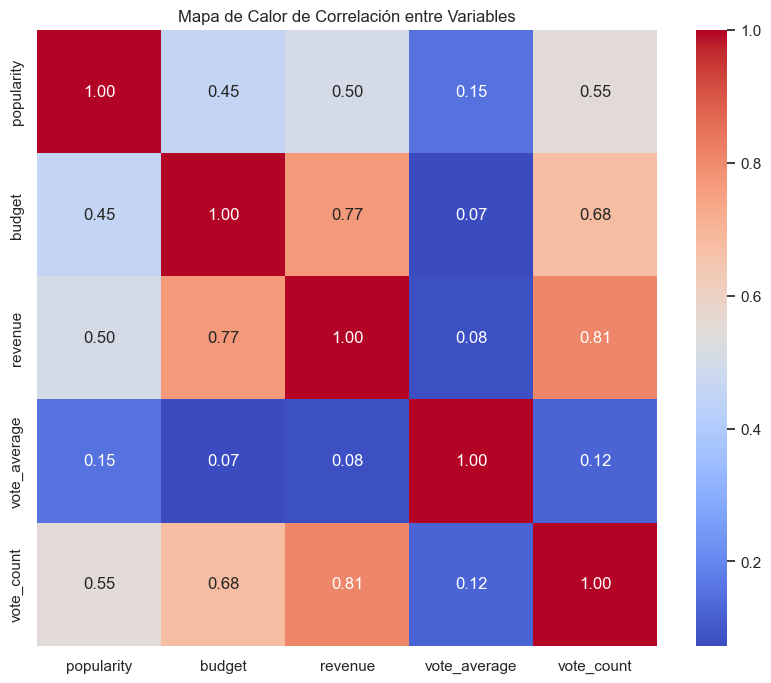

In [3]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
ruta_datos = '../DATASET/movies_credits_merged.parquet'
movies = pd.read_parquet(ruta_datos)

# Seleccionar solo las columnas numéricas para el análisis de correlación
numerical_data = movies[['popularity', 'budget', 'revenue', 'vote_average', 'vote_count']]

# Calcular la matriz de correlación
correlation_matrix = numerical_data.corr()

# Generar un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Mapa de Calor de Correlación entre Variables')
plt.show()


Interpretación del Mapa de Calor
Valores en la Diagonal (1.00): Son las correlaciones de cada variable consigo misma, por lo que son perfectamente correlacionadas (correlación = 1).

Presupuesto (Budget) y Ingresos (Revenue):
Correlación: 0.77
Interpretación: Hay una fuerte correlación positiva entre el presupuesto de una película y los ingresos que genera. Esto sugiere que las películas con mayores presupuestos tienden a generar mayores ingresos.

Popularidad (Popularity) y Conteo de Votos (Vote Count):
Correlación: 0.55
Interpretación: Existe una correlación positiva significativa entre la popularidad de una película y el número de votos que recibe. Esto puede indicar que las películas más populares atraen más votos.

Ingresos (Revenue) y Conteo de Votos (Vote Count):
Correlación: 0.70
Interpretación: Las películas con mayores ingresos también tienden a tener un mayor número de votos, lo que puede reflejar una mayor visibilidad o interés del público.

Presupuesto (Budget) y Popularidad (Popularity):
Correlación: 0.50
Interpretación: Hay una correlación moderada entre el presupuesto y la popularidad, sugiriendo que invertir más en la producción de una película puede contribuir a su popularidad.

Consideraciones Adicionales
Correlaciones Bajas:
Algunas variables como el vote_average (promedio de votos) tienen correlaciones relativamente bajas con otras variables como budget y revenue. Esto puede indicar que la calidad percibida de una película (según los votos promedio) no está necesariamente ligada a su presupuesto o éxito financiero.

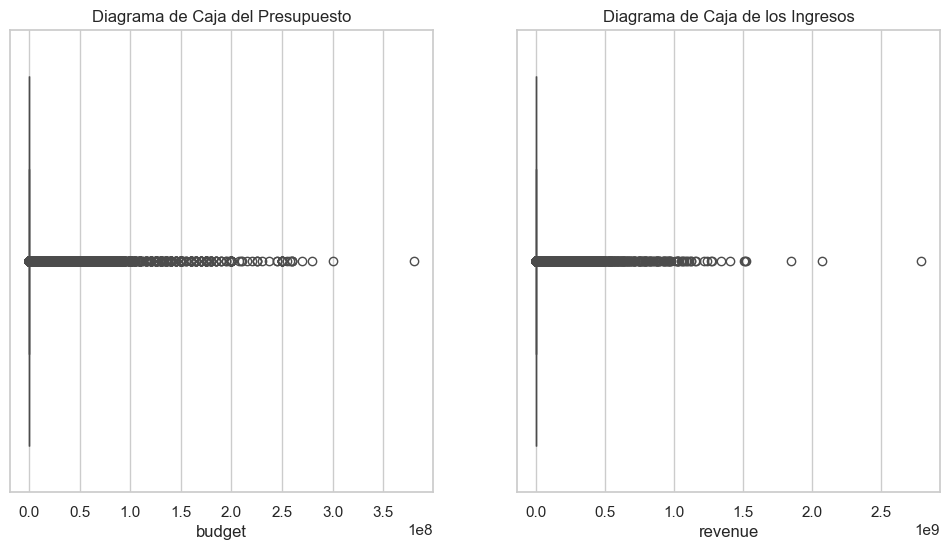

Outliers en Presupuesto:                    title    budget
0              Toy Story  30000000
1                Jumanji  65000000
3      Waiting to Exhale  16000000
5                   Heat  60000000
6                Sabrina  58000000
...                  ...       ...
44873    Corporate Event   2000000
44879               Mars   2000000
44880            Savages    800000
44882        Pro Lyuboff   2000000
44892            Antidur   5000000

[8781 rows x 2 columns]
Outliers en Ingresos:                              title      revenue
0                        Toy Story  373554033.0
1                          Jumanji  262797249.0
3                Waiting to Exhale   81452156.0
4      Father of the Bride Part II   76578911.0
5                             Heat  187436818.0
...                            ...          ...
44870                  All at Once          3.0
44872                  The Miracle      50656.0
44880                      Savages    1328612.0
44882                  Pro L

In [4]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
ruta_datos = '../DATASET/movies_credits_merged.parquet'
movies = pd.read_parquet(ruta_datos)

# Crear diagramas de caja para el presupuesto y los ingresos
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=movies['budget'])
plt.title('Diagrama de Caja del Presupuesto')

plt.subplot(1, 2, 2)
sns.boxplot(x=movies['revenue'])
plt.title('Diagrama de Caja de los Ingresos')
plt.show()

# Identificar outliers basándonos en un criterio como el IQR
Q1_budget = movies['budget'].quantile(0.25)
Q3_budget = movies['budget'].quantile(0.75)
IQR_budget = Q3_budget - Q1_budget

# Definir límites para considerar un dato como outlier
lower_bound_budget = Q1_budget - 1.5 * IQR_budget
upper_bound_budget = Q3_budget + 1.5 * IQR_budget

# Filtrar los datos para identificar outliers en el presupuesto
outliers_budget = movies[(movies['budget'] < lower_bound_budget) | (movies['budget'] > upper_bound_budget)]

# Hacer lo mismo para los ingresos
Q1_revenue = movies['revenue'].quantile(0.25)
Q3_revenue = movies['revenue'].quantile(0.75)
IQR_revenue = Q3_revenue - Q1_revenue

lower_bound_revenue = Q1_revenue - 1.5 * IQR_revenue
upper_bound_revenue = Q3_revenue + 1.5 * IQR_revenue

outliers_revenue = movies[(movies['revenue'] < lower_bound_revenue) | (movies['revenue'] > upper_bound_revenue)]

# Mostrar resultados
print("Outliers en Presupuesto:", outliers_budget[['title', 'budget']])
print("Outliers en Ingresos:", outliers_revenue[['title', 'revenue']])
